Number of snapshorts: 50000
Time of first and last snapshot: 0.0, 49999000.0


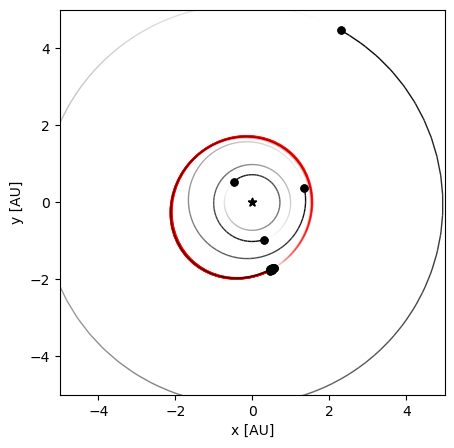

In [ ]:
import rebound
from rebound import hash as h

sa = rebound.SimulationArchive("archive.bin")
print("Number of snapshorts: %d" %len(sa))
print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))

N_pl = 8
N_tp = 20

sim = sa[0]
rebound.OrbitPlot(sim, unitlabel="[AU]",color=(N_pl-1)*["black"]+N_tp*["red"], xlim=[-5,5],ylim=[-5,5])

In [ ]:
print(len(sa))

50000


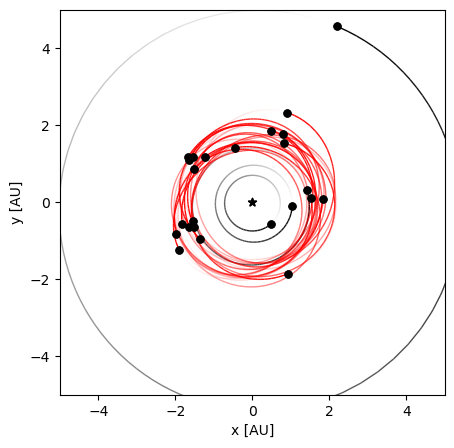

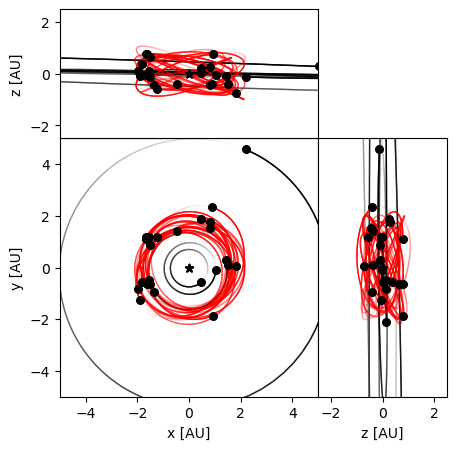

In [ ]:
sim = sa[-1]
rebound.OrbitPlot(sim, unitlabel="[AU]",color=(N_pl-1)*["black"]+N_tp*["red"], xlim=[-5,5],ylim=[-5,5])
#sim.status()
rebound.OrbitPlotSet(sim, unitlabel="[AU]",color=(N_pl-1)*["black"]+N_tp*["red"], xlim=[-5,5],ylim=[-5,5])


In [ ]:
orbits = sim.calculate_orbits()
for orbit in orbits:
    print(orbit)

<rebound.Orbit instance, a=0.723327842572595 e=0.027880157663561972 inc=0.019287335307736023 Omega=-2.5066685256721706 omega=4.2099737925566565 f=3.7131230950305714>
<rebound.Orbit instance, a=0.9999855265467555 e=0.05166542071572156 inc=0.028992061935418582 Omega=1.7924937408316095 omega=0.6256197300869717 f=3.7684927440809837>
<rebound.Orbit instance, a=1.5236405000889002 e=0.07717191601438671 inc=0.09919390175857717 Omega=2.6998942370710064 omega=4.818346504939358 f=5.265633672063343>
<rebound.Orbit instance, a=5.202748348430536 e=0.05283539053563819 inc=0.03373866944477058 Omega=1.9478658719545867 omega=0.309166605545542 f=5.150269016843167>
<rebound.Orbit instance, a=9.542574610091707 e=0.04495352924782288 inc=0.015248036966001894 Omega=1.4323764423946561 omega=5.605086102039432 f=2.602237085073156>
<rebound.Orbit instance, a=19.194256457920492 e=0.031029769815126118 inc=0.04127887615873919 Omega=2.21630394581806 omega=1.9217436945802842 f=0.8457802988176084>
<rebound.Orbit instan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


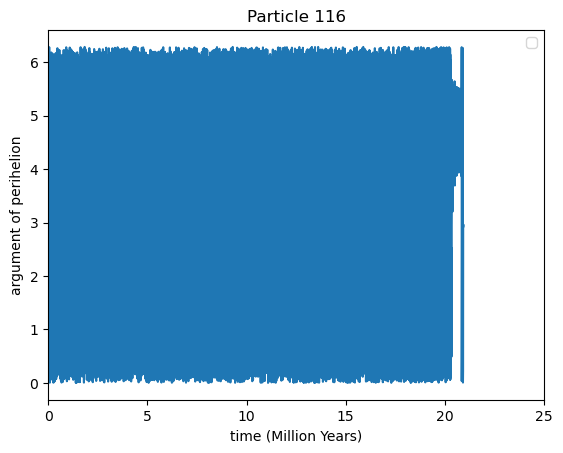

In [ ]:
#data analysis

import numpy as np
import matplotlib.pyplot as plt

t = np.zeros(len(sa)) # Time
a = np.zeros(len(sa)) # semi-major axis
e = np.zeros(len(sa)) # eccentricity
inc = np.zeros(len(sa)) # inclination
O = np.zeros(len(sa)) # longitude of ascending node
o = np.zeros(len(sa)) # argument of perihelion
M = np.zeros(len(sa)) # mean anomaly

pid = 116 # Test Particle ID
for i, sim in enumerate(sa):
    try:
        t[i] = sim.t/1e6 # Change from years to Millions of Years
        a[i] = sim.particles[h(pid)].a
        e[i] = sim.particles[h(pid)].e
        inc[i] = sim.particles[h(pid)].inc
        O[i] = sim.particles[h(pid)].Omega
        o[i] = sim.particles[h(pid)].omega
        M[i] = sim.particles[h(pid)].M
    except rebound.ParticleNotFound:
        a = a[:i]
        e = e[:i]
        inc = inc[:i]
        O = O[:i]
        o = o[:i]
        t = t[:i]
        M = M[:i]
        break

plt.plot(t,o)
plt.xlim(0,25)
#plt.yscale("log")
plt.xlabel("time (Million Years)")
plt.ylabel("argument of perihelion")
plt.title("Particle {0}".format(pid))
plt.legend()


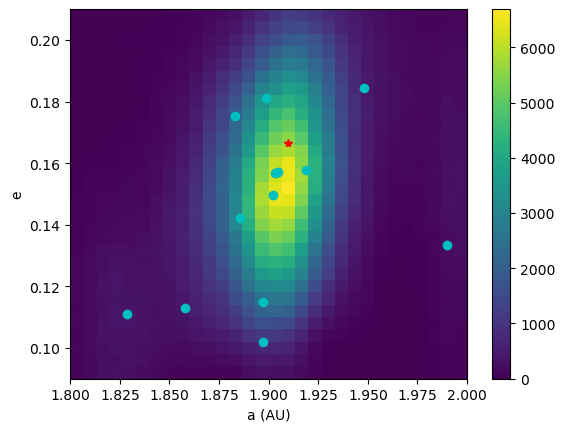

In [ ]:
#residence plot

a_all = []
e_all = []

for i, sim in enumerate(sa):
    for pid in range(100,100+N_tp):
        try:
            a_all.append(sim.particles[h(pid)].a)
            e_all.append(sim.particles[h(pid)].e)
        except rebound.ParticleNotFound:
            continue # Continue on with the next clone
amin, amax = 1.8,2.0
emin, emax = 0.09, 0.21
h2d,xedge,yedge,im = plt.hist2d(a_all, e_all, range=[[amin,amax],[emin,emax]],bins=(30, 30))
plt.xlabel("a (AU)")
plt.ylabel("e")
a_init = 1.909733
e_init = 0.166689
plt.plot(a_init,e_init,"*",color="r")
plt.colorbar()
sim = sa[-1]
a_tp = []
e_tp = []

for pid in range(100,100+N_tp):
    try:
        a_tp.append(sim.particles[h(pid)].a)
        e_tp.append(sim.particles[h(pid)].e)
    except:
        continue
plt.plot(a_tp,e_tp,"co")

In [ ]:
sa[-1]

<rebound.simulation.Simulation object at 0x7efa61768040, N=29, t=18059000.003104396>

KeyboardInterrupt: 

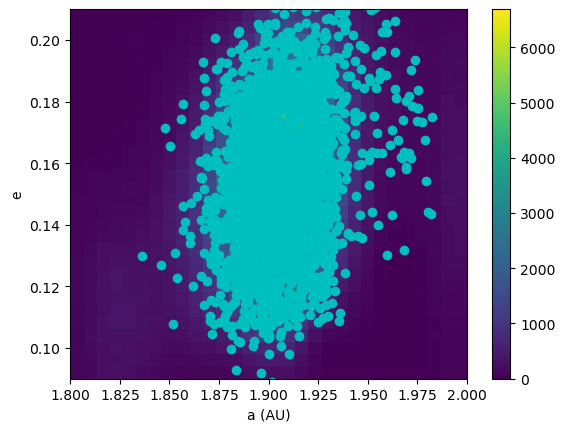

In [ ]:
from celluloid import Camera
from IPython.display import HTML

fig, ax = plt.subplots() # creating my fig
cbar = fig.colorbar(im,ax=ax)
cax = cbar.ax

amin, amax = 1.8,2.0
emin, emax = 0.09, 0.21
h2d,xedge,yedge,im = plt.hist2d(a_all, e_all, range=[[amin,amax],[emin,emax]],bins=(30, 30))
plt.xlabel("a (AU)")
plt.ylabel("e")
a_init = 1.909733
e_init = 0.166689
plt.plot(a_init,e_init,"*",color="r")

camera = Camera(fig)# the camera gets the fig we’ll plot
for i, sim in enumerate(sa):
    if i%100: # Thin the output
        continue
    for pid in range(100,100+N_tp):
        try:
            cax = cbar.ax
            plt.plot(sim.particles[h(pid)].a, sim.particles[h(pid)].e, "co")
            h2d,xedge,yedge,im = plt.hist2d(a_all, e_all, range=[[amin,amax],[emin,emax]],bins=(30, 30))
        except rebound.ParticleNotFound:
            continue # Continue on with the next clone

    #print(sim.particles[h(pid)].a,sim.particles[h(pid)].e)

    camera.snap() # the camera takes a snapshot of the plot
animation = camera.animate() # animation ready
HTML(animation.to_html5_video())


In [ ]:
animation.save("my_animation.gif")